In [1]:
import os
import pandas as pd

In [2]:
# Save Data Path to CSV File

data_path = "./dataset"

data = []

for labels in os.listdir(data_path):
    labels_path = os.path.join(data_path, labels)
    if os.path.isdir(labels_path):
        for file_name in os.listdir(labels_path):
            if file_name.endswith(".wav"):
                file_path = os.path.join(labels_path, file_name)
                data.append([file_path, labels])

# Membuat DataFrame menggunakan pandas
df = pd.DataFrame(data, columns=["File_Path", "labels"])

# Menyimpan DataFrame ke file CSV
csv_file = './data_path_1_second.csv'  # Ganti dengan path yang sesuai
df.to_csv(csv_file, index=False)

print(f"Data telah disimpan ke {csv_file}")


Data telah disimpan ke ./data_path_1_second.csv


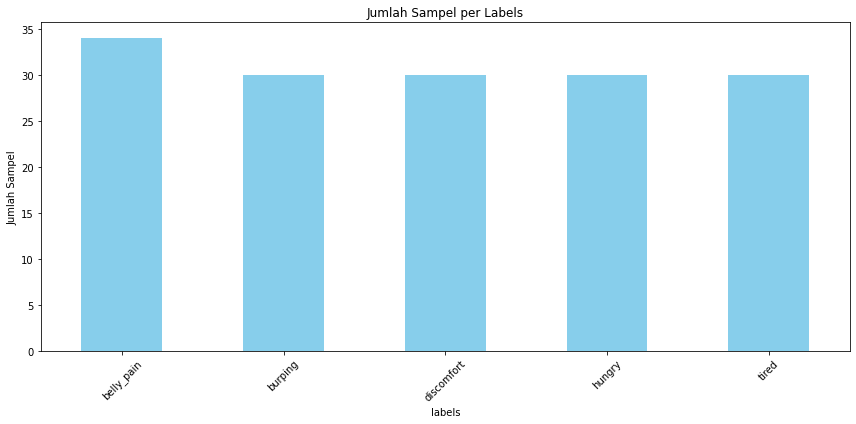

In [3]:
# Visualisasi data dengan grafik batang

import matplotlib.pyplot as plt

genre_counts = df['labels'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', rot=45, color='skyblue')
plt.title('Jumlah Sampel per Labels')
plt.xlabel('labels')
plt.ylabel('Jumlah Sampel')
plt.tight_layout()

# Menampilkan grafik batang
plt.show()

In [4]:
# Create Data Frame

df = pd.DataFrame(data, columns=["File_Path", "labels"])

In [5]:
# Show 5 data 

df.head()

,File_Path,labels
0,./dataset\belly_pain\belly-pain_ (1).wav,belly_pain
1,./dataset\belly_pain\belly-pain_ (10).wav,belly_pain
2,./dataset\belly_pain\belly-pain_ (11).wav,belly_pain
3,./dataset\belly_pain\belly-pain_ (12).wav,belly_pain
4,./dataset\belly_pain\belly-pain_ (13).wav,belly_pain


In [7]:
# Add Index Column

df['Index'] = df.index

In [8]:

df.head()

,File_Path,labels,Index
0,./dataset\belly_pain\belly-pain_ (1).wav,belly_pain,0
1,./dataset\belly_pain\belly-pain_ (10).wav,belly_pain,1
2,./dataset\belly_pain\belly-pain_ (11).wav,belly_pain,2
3,./dataset\belly_pain\belly-pain_ (12).wav,belly_pain,3
4,./dataset\belly_pain\belly-pain_ (13).wav,belly_pain,4


In [9]:
# Show WavePlot and Create Spectogram using Librosa

import librosa
import librosa.display
import seaborn as sns
import numpy as np
from IPython.display import Audio

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} Labels'.format(e), size=15)
    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} Labels'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

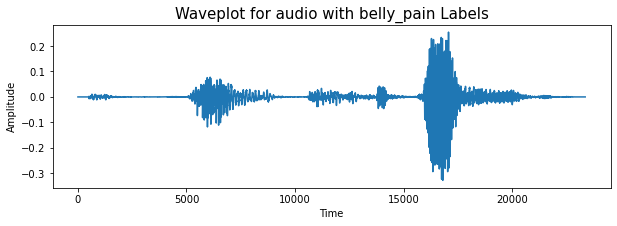

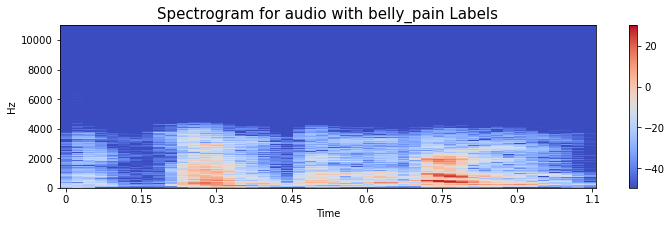

In [10]:
# Belly Pain

labels='belly_pain'
path = np.array(df.File_Path[df.labels==labels])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, labels)
create_spectrogram(data, sampling_rate, labels)
Audio(path)

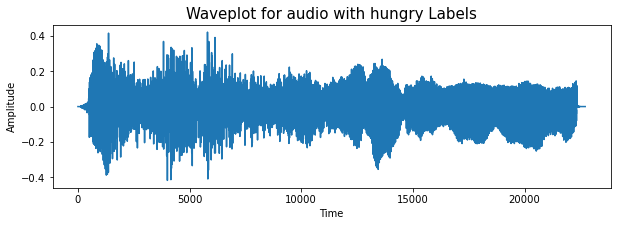

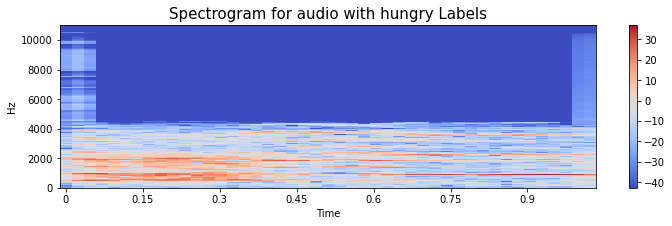

In [11]:
# Hungry

labels='hungry'
path = np.array(df.File_Path[df.labels==labels])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, labels)
create_spectrogram(data, sampling_rate, labels)
Audio(path)

In [ ]:
#  Discomf